In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Outlier에 대한 잘못된 편견
- 아무래도 극단적인 값이고 전체 데이터 범위를 넘는 값이다보니 이 데이터를 이상치로 생각하고 무조건 제거해야 한다.
- 제거하는 것이 문제 또 될 수 있습니다.
- 이상치라는 것이 데이터의 분포 기준에 이상치라면 -> 이상치라고 보기에는 실제 군집 또는 데이터가 만들어 진 것이다.
- ex) 백화점 고객데이터 -> 일반고객과 vip 다 다르다. 고객의 구매 금액을 시각화하면 일반적인적인 고객과 비교하면 -> outlier
- 백화점입장에서 보면 -> Outlier VVIP 다르게 생각하면 더 집중해야하는 고객일 수 있고 이 부분을 고민을 해야 한다.

- 데이터 분포가 Outlier와 기존의 데이터분포로 나눠진다면 의심을 해볼 수 있다. 과연 이 Outlier 의미가 이상치 인지 또는 살려야 되는지
- 이상치에 대한 군집이 형성된다면 -> 두 개의 군집으로 나눠서 분석도 할 수 있다.

- 두 개의 군집을 나누지 않고 -> 일반화 되는 경우가 있다면 ->?
- 가중치를 두어서 outlier에 대한 값의 변수를 추가할 수 있다.


---
- 어떤 정답이 있는 방법은 절대 아니기 때문에 -> 목적-> 해당 목적에 맞는 이상치 제거에 대한 방법을 생각해야 합니다.
- 단순하게 수치적으로만 접근해서 이상치를 제거하고 -> 성능을 높이고 -> 일반화를 할 수 있는 것인가?

In [2]:
# 각반의 수학 점수
t_math1 = [40,30,20,45,63,69,25,31,12,14,100]
t_math2 = [11,13,14,21,22,25,10,9,12,7,100]

In [3]:
sp_df = pd.DataFrame({'scoring_1':t_math1,
                     'scoring_2':t_math2})

<Axes: ylabel='scoring_1'>

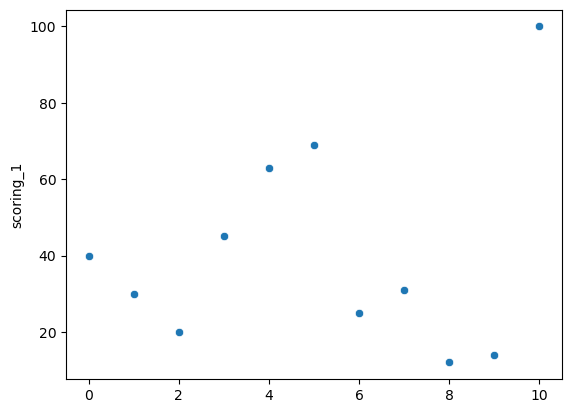

In [4]:
sns.scatterplot(sp_df.scoring_1)
# 충분히 이상치가 아닌 100점은 나올 수 있는 점수
#

<Axes: ylabel='scoring_2'>

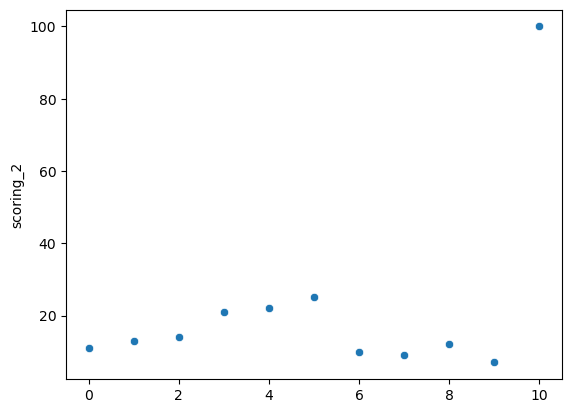

In [5]:
sns.scatterplot(sp_df.scoring_2)

### 예시 데이터를 가지고 Outlier를 확인하기!

In [6]:
from sklearn import datasets

dataset = datasets.fetch_california_housing()
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
df['target'] = dataset.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


<Axes: >

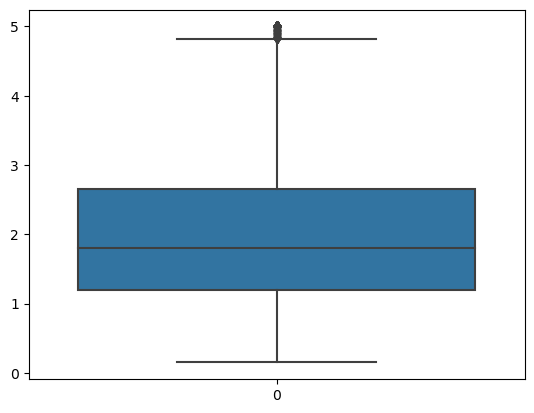

In [7]:
#boxplot을 이용해서
sns.boxplot(df.target)

<Axes: >

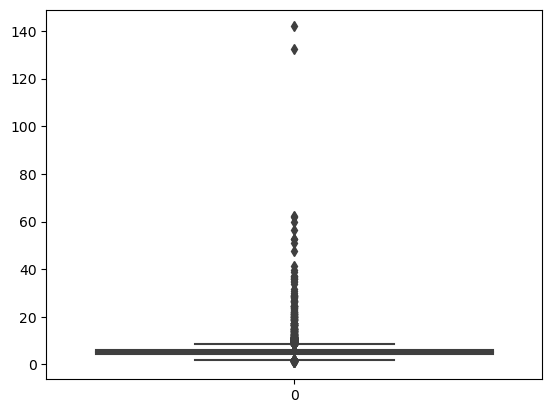

In [8]:
#boxplot을 이용해서
sns.boxplot(df.AveRooms)

In [9]:
df.AveRooms.describe()

count    20640.000000
mean         5.429000
std          2.474173
min          0.846154
25%          4.440716
50%          5.229129
75%          6.052381
max        141.909091
Name: AveRooms, dtype: float64

In [10]:
df.target.describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: target, dtype: float64

In [11]:
#넘파이를 통해서 최대값에 인덱스를 추출한다.
np.argmax(df['AveRooms'])

1914

In [12]:
df.iloc[1914]

MedInc          1.875000
HouseAge       33.000000
AveRooms      141.909091
AveBedrms      25.636364
Population     30.000000
AveOccup        2.727273
Latitude       38.910000
Longitude    -120.100000
target          5.000010
Name: 1914, dtype: float64

### 이상치를 꼭 제거하지 않고 회귀분석의 RMSE 정도를 낮출 순 없을까? -가중치나 이런 새로운 변수를 만들면 정말 성능이 더 좋아지는 것인가?

In [13]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'target'],
      dtype='object')

In [14]:
df_sp = df[['AveRooms','HouseAge','Population','target']]

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
#train, test 나누기
x_train, x_test, y_train, y_test = train_test_split(df_sp.drop('target',axis=1), df_sp['target'], test_size=0.3, random_state=111)

## 베이스

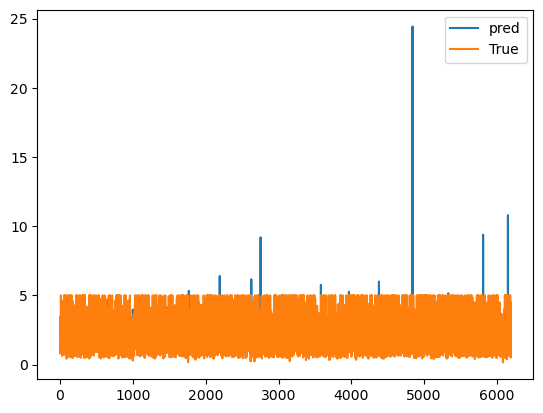

In [17]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

fit_train1 = sm.OLS(y_train, x_train)
fit_train1 = fit_train1.fit()

# 예측한 값
plt.plot(np.array(fit_train1.predict(x_test)),label='pred')
plt.plot(np.array(y_test), label='True')
plt.legend()
plt.show()

In [18]:
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(y_true = y_test, y_pred = fit_train1.predict(x_test))
print(mse1)

1.3737537935478012


- 베이스라인 모델로 회귀분석 진행 시 1.3

## 이상치 제거를 AveRooms 제거해 보자!
- IQR 제거를 해보자!
- 통계치에 대한 개념으로 제거를 하면!

In [19]:
Q1 = df_sp['AveRooms'].quantile(0.25)
Q3 = df_sp['AveRooms'].quantile(0.75)
IQR = Q3-Q1
rev_range = 3
filter1 = (df_sp['AveRooms'] >= Q1 - rev_range*IQR) & (df_sp['AveRooms'] <=Q3 + rev_range*IQR)

In [20]:
df_sp_rmv = df_sp.loc[filter1]

In [21]:
df_sp_rmv

,AveRooms,HouseAge,Population,target
0,6.984127,41.0,322.0,4.526
1,6.238137,21.0,2401.0,3.585
2,8.288136,52.0,496.0,3.521
3,5.817352,52.0,558.0,3.413
4,6.281853,52.0,565.0,3.422
...,...,...,...,...
20635,5.045455,25.0,845.0,0.781
20636,6.114035,18.0,356.0,0.771
20637,5.205543,17.0,1007.0,0.923
20638,5.329513,18.0,741.0,0.847


#### 이상치 제거하기!

In [22]:
def replace_outlier(value):
    Q1 = df_sp['AveRooms'].quantile(0.25)
    Q3 = df_sp['AveRooms'].quantile(0.75)
    IQR = Q3-Q1
    rev_range = 3

    if((value <(Q1-rev_range*IQR))):
        value = np.nan
    if((value >(Q3+rev_range*IQR))):
        value = np.nan
    return value

df_sp['AveRooms'] = df_sp['AveRooms'].apply(replace_outlier)

C:\Users\munbe\AppData\Local\Temp\ipykernel_17828\4001243353.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp['AveRooms'] = df_sp['AveRooms'].apply(replace_outlier)


In [23]:
df_sp.isna().sum()

AveRooms      180
HouseAge        0
Population      0
target          0
dtype: int64

In [24]:
#이상치를 제거하고 분석해 보자!
df_sp2=df_sp.dropna()

In [25]:
df_sp2

,AveRooms,HouseAge,Population,target
0,6.984127,41.0,322.0,4.526
1,6.238137,21.0,2401.0,3.585
2,8.288136,52.0,496.0,3.521
3,5.817352,52.0,558.0,3.413
4,6.281853,52.0,565.0,3.422
...,...,...,...,...
20635,5.045455,25.0,845.0,0.781
20636,6.114035,18.0,356.0,0.771
20637,5.205543,17.0,1007.0,0.923
20638,5.329513,18.0,741.0,0.847


In [26]:
#이상치를 제거한 train, test 나누기
x_train, x_test, y_train, y_test = train_test_split(df_sp2.drop('target',axis=1), df_sp2['target'], test_size=0.3, random_state=111)

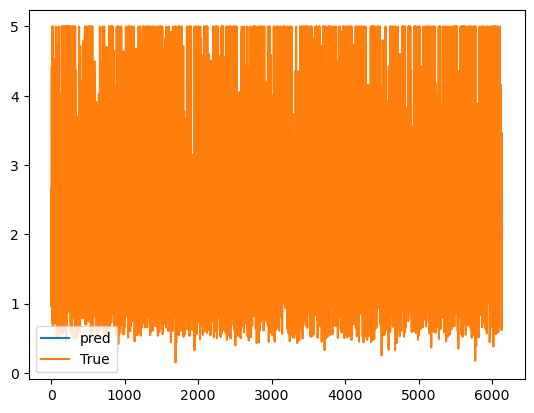

In [27]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

fit_train1 = sm.OLS(y_train, x_train)
fit_train1 = fit_train1.fit()

# 예측한 값
plt.plot(np.array(fit_train1.predict(x_test)),label='pred')
plt.plot(np.array(y_test), label='True')
plt.legend()
plt.show()

In [28]:
from sklearn.metrics import mean_squared_error
mse2 = mean_squared_error(y_true = y_test, y_pred = fit_train1.predict(x_test))
print(mse2)

1.1694755604062264


In [29]:
print(mse1)
print(mse2)

1.3737537935478012
1.1694755604062264


### 이상치를 살리는 경우 분석을 진행하는 경우는 어떤 식으로 하면 될까!?
- 이상치의 가중치를 둔다고 하면 1,이상치 아닌 경우는 0
- 이상치가 아닌 경우가 1 이상치는 0

- 이상치에 가중치를 좀 더 둬서 어떤 식으로 진행이 되는지?

In [30]:
def saving_outlier(value):
    Q1 = df_sp['AveRooms'].quantile(0.25)
    Q3 = df_sp['AveRooms'].quantile(0.75)
    IQR = Q3-Q1
    rev_range = 3

    if((value < (Q1 - rev_range*IQR))):
        value = 1
    elif((value > (Q3 + rev_range*IQR))):
        value = 1
    else:
        value = 0
    return value

df_sp['AveRooms_sv'] = df_sp['AveRooms'].apply(saving_outlier)

C:\Users\munbe\AppData\Local\Temp\ipykernel_17828\4016016948.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp['AveRooms_sv'] = df_sp['AveRooms'].apply(saving_outlier)


In [31]:
df_sp.AveRooms_sv.sum()

5

In [32]:
df_sp

,AveRooms,HouseAge,Population,target,AveRooms_sv
0,6.984127,41.0,322.0,4.526,0
1,6.238137,21.0,2401.0,3.585,0
2,8.288136,52.0,496.0,3.521,0
3,5.817352,52.0,558.0,3.413,0
4,6.281853,52.0,565.0,3.422,0
...,...,...,...,...,...
20635,5.045455,25.0,845.0,0.781,0
20636,6.114035,18.0,356.0,0.771,0
20637,5.205543,17.0,1007.0,0.923,0
20638,5.329513,18.0,741.0,0.847,0


In [33]:
#이상치를 제거한 train, test 나누기
x_train, x_test, y_train, y_test = train_test_split(df_sp.drop('target',axis=1), df_sp['target'], test_size=0.3, random_state=111)

In [34]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

fit_train3 = sm.OLS(y_train, x_train)
fit_train3 = fit_train3.fit()

# 예측한 값
plt.plot(np.array(fit_train3.predict(x_test)),label='pred')
plt.plot(np.array(y_test), label='True')
plt.legend()
plt.show()

MissingDataError: exog contains inf or nans

In [ ]:
from sklearn.metrics import mean_squared_error
mse3 = mean_squared_error(y_true = y_test, y_pred = fit_train3.predict(x_test))
print(mse3)

In [ ]:
print(mse1,'기존 base')
print(mse2,'outlier 제거')
print(mse3,'outlier saving')

### 복습과제는 동일하게 다음 주까지 해주시면 됩니다.

### 필수과제 1
- 캘리포니아 데이터를 가지고 다른 변수들까지 추가해 보시면서 실제 outlier에 대한 값을 비교해 보고
- 본인이 선택한 변수에서 outlier 파생변수를 추가한 내용과
- outlier 제거에 대한 내용 비교 분석하시면 됩니다.

- 어떤 식으로 값이 변하는지 정리해 주시면 됩니다.
- 과제 기간은 시험기간 끝난 후 11월 첫 수업 전까지 제출하시면 됩니다. (필수과제는)